Preprocessing the Data:
  1. Inspect the Dataset:
  
      - Loadanddisplay the dataset.

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('BikeSharingAssignment.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.shape

(10886, 12)

In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
df.dtypes == 'object'

datetime       True
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

- Checkfor missing values and duplicates.

In [7]:
df.isnull().sum()   # no missing values!

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
# To check if there is any duplicated rows - للتحقق إن كانت هناك صف سجل مرتين
df.loc[df.duplicated()]   # no duplicated values!

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


Encode Categorical Variables:
 - Convert categorical variables into a numerical format using encoding techniques (e.g., one-hot encoding).

In [9]:
print('Object columns are as follows')
df.loc[:,df.dtypes==object].columns

Object columns are as follows


Index(['datetime'], dtype='object')

In [10]:
print(df.datetime.nunique())

10886


In [11]:
# ومن أجل حل مشكلة العدد الكبير للتواريخ لان هذا يعني ان هيكون لدينا بعد عملية الكودينج 10885 عمود جديد اضافي  فقط من هذا العمود 

#  اول خطوة سوف نقوم نقوم بفصل التاريخ عن الشهر
a = df['datetime'].apply(lambda x : x.split(' '))
a

0        [2011-01-01, 00:00:00]
1        [2011-01-01, 01:00:00]
2        [2011-01-01, 02:00:00]
3        [2011-01-01, 03:00:00]
4        [2011-01-01, 04:00:00]
                  ...          
10881    [2012-12-19, 19:00:00]
10882    [2012-12-19, 20:00:00]
10883    [2012-12-19, 21:00:00]
10884    [2012-12-19, 22:00:00]
10885    [2012-12-19, 23:00:00]
Name: datetime, Length: 10886, dtype: object

In [12]:
li=list(a)
arr=np.array(li)
arr[:,0], arr[:,1]

(array(['2011-01-01', '2011-01-01', '2011-01-01', ..., '2012-12-19',
        '2012-12-19', '2012-12-19'], shape=(10886,), dtype='<U10'),
 array(['00:00:00', '01:00:00', '02:00:00', ..., '21:00:00', '22:00:00',
        '23:00:00'], shape=(10886,), dtype='<U10'))

In [13]:
# تخزين الاعمدة الجديدة في قاعدة البيانات
df.insert(1,"date",arr[:,0])
df.insert(2,"time",arr[:,1])

In [14]:
# التخلص من عمود الوقت والتاريخ معا
df.drop(['datetime'], axis=1, inplace=True)

In [15]:
df.head(3)

,date,time,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01,01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01,02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [16]:
df.date.nunique()
# ايضا العدد كبير, نريد استخراج الشهر والعام فقط

456

In [17]:
# نريد استخرام السنة والشهر فقط
b = df['date'].apply(lambda x : x.split('-'))
lis=list(b)
arr2=np.array(lis)
arr2= arr2[:,0]+"_"+arr2[:,1]
arr2

array(['2011_01', '2011_01', '2011_01', ..., '2012_12', '2012_12',
       '2012_12'], shape=(10886,), dtype='<U9')

In [18]:
# التخلص من عمود التاريخ كامل 
df.drop(['date'], axis=1, inplace=True)

In [19]:
# تخزين عمود التاريخ الجديد في قاعدة البيانات
df.insert(0,"date",arr2)

In [20]:
df.head(3)

,date,time,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011_01,00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011_01,01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011_01,02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [21]:
df.date.nunique()   # good

24

In [22]:
df.time.nunique()   # good

24

In [23]:
print(df.date.unique())
print(df.time.unique())
# لاحظنا عدم وجود تكرار لنفس المعلومة باكثر من شكل

['2011_01' '2011_02' '2011_03' '2011_04' '2011_05' '2011_06' '2011_07'
 '2011_08' '2011_09' '2011_10' '2011_11' '2011_12' '2012_01' '2012_02'
 '2012_03' '2012_04' '2012_05' '2012_06' '2012_07' '2012_08' '2012_09'
 '2012_10' '2012_11' '2012_12']
['00:00:00' '01:00:00' '02:00:00' '03:00:00' '04:00:00' '05:00:00'
 '06:00:00' '07:00:00' '08:00:00' '09:00:00' '10:00:00' '11:00:00'
 '12:00:00' '13:00:00' '14:00:00' '15:00:00' '16:00:00' '17:00:00'
 '18:00:00' '19:00:00' '20:00:00' '21:00:00' '22:00:00' '23:00:00']


In [24]:
df.dtypes

date           object
time           object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [25]:
ecnoded_df = pd.get_dummies(df)
print('The new df is')
display(ecnoded_df.head(3))
print('The size of the dataframe is')
print(' We have', ecnoded_df.shape[0], 'rows, and', ecnoded_df.shape[1], 'columns')

The new df is


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,time_14:00:00,time_15:00:00,time_16:00:00,time_17:00:00,time_18:00:00,time_19:00:00,time_20:00:00,time_21:00:00,time_22:00:00,time_23:00:00
0,1,0,0,1,9.84,14.395,81,0.0,3,13,...,False,False,False,False,False,False,False,False,False,False
1,1,0,0,1,9.02,13.635,80,0.0,8,32,...,False,False,False,False,False,False,False,False,False,False
2,1,0,0,1,9.02,13.635,80,0.0,5,27,...,False,False,False,False,False,False,False,False,False,False


The size of the dataframe is
 We have 10886 rows, and 59 columns


In [26]:
ecnoded_df.loc[ecnoded_df.duplicated()]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,time_14:00:00,time_15:00:00,time_16:00:00,time_17:00:00,time_18:00:00,time_19:00:00,time_20:00:00,time_21:00:00,time_22:00:00,time_23:00:00
4682,4,0,1,1,12.30,16.665,87,0.0000,0,4,...,False,False,False,False,False,False,False,False,False,False
5188,4,0,0,1,9.84,12.880,65,7.0015,1,10,...,False,False,False,False,False,False,False,False,False,False
6212,1,0,1,1,12.30,16.665,61,0.0000,0,4,...,False,False,False,False,False,False,False,False,False,False
9450,3,0,1,1,20.50,24.240,77,6.0032,0,7,...,False,False,False,False,False,False,False,False,False,False


In [27]:
# يبدو انه ظهر لدينا تكرار بعد عملية فصل عمود التارخ والوقت الى عمودين وازالة اليوم من التاريخ, سوف اقوم باكمال التدريب على مجموعة البيانات دون حذف التكرار, وبعد ذلك سوف اقوم بتدريب النموذج مرة ثانية بعد عملية حذف التكرار لمقارنة النتائج

2. Exploratory Data Analysis (EDA):

        1- Analyze the Target Variable

        2- Analyze Relationships:

             - Usescatter plots or bar charts to analyze relationships between features and the target variable.

         3- Correlation Analysis:
  
             - Create a correlation heatmap to identify features strongly correlated with the target variable.

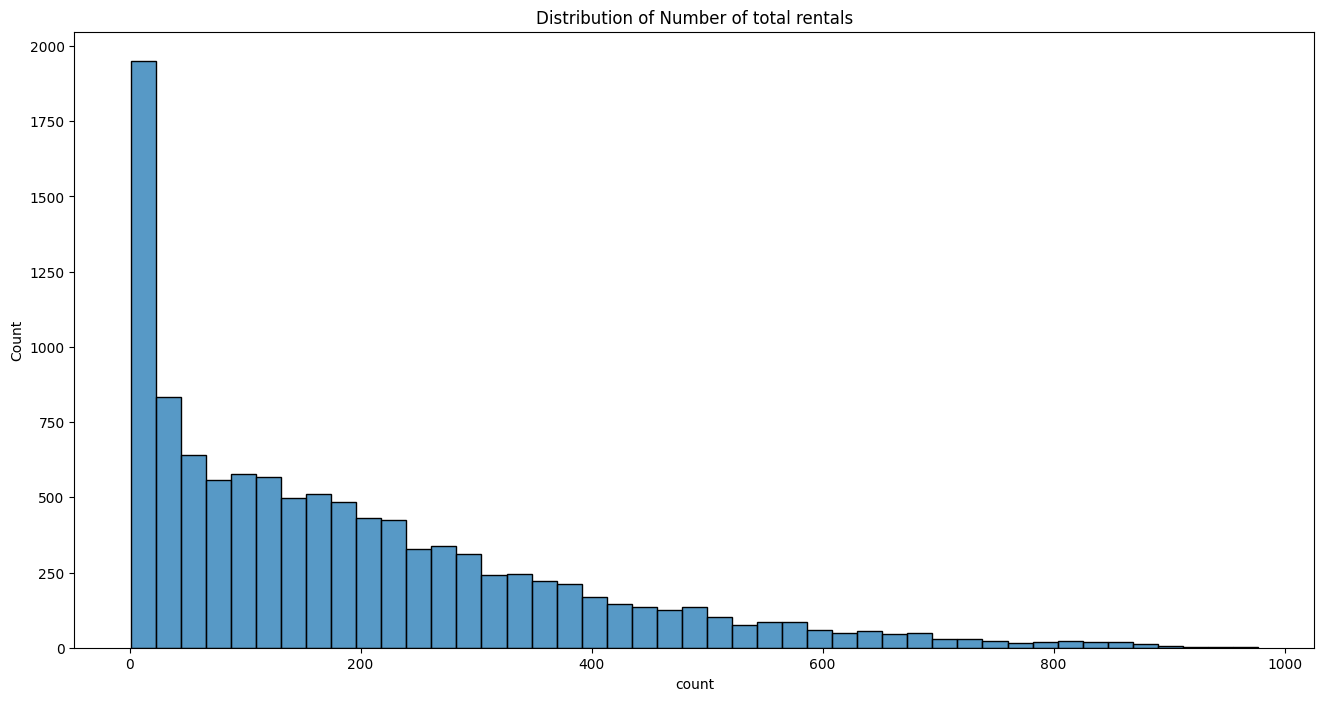

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
85%        378.000000
90%        452.000000
100%       977.000000
max        977.000000
Name: count, dtype: float64


In [28]:
# 1- Analyze the Target Variable
import matplotlib.pyplot as plt  # For plotting 1 - المكتبة الأولى للرسم
import seaborn as sns            # For plotting 2 - المكتبة الثانية للرسم
plt.figure(figsize=(16,8))
plt.title('Distribution of Number of total rentals')
sns.histplot(ecnoded_df['count'])
plt.show()
print(ecnoded_df['count'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))


In [29]:
# على الرغم من متوسط عدد الايجارات هو 191 إلا أن الانحراف المعياري std.
# عالي القيمة مما يعني أن هناك تباين كبير في القيم، وهو ما يمكن ملاحظته حين النظر إلى الطرف اليمين من الرسمة سوف نلاحظ وجود عدد ايجارات اعلى من 900
# This kind of distribution (long tail)


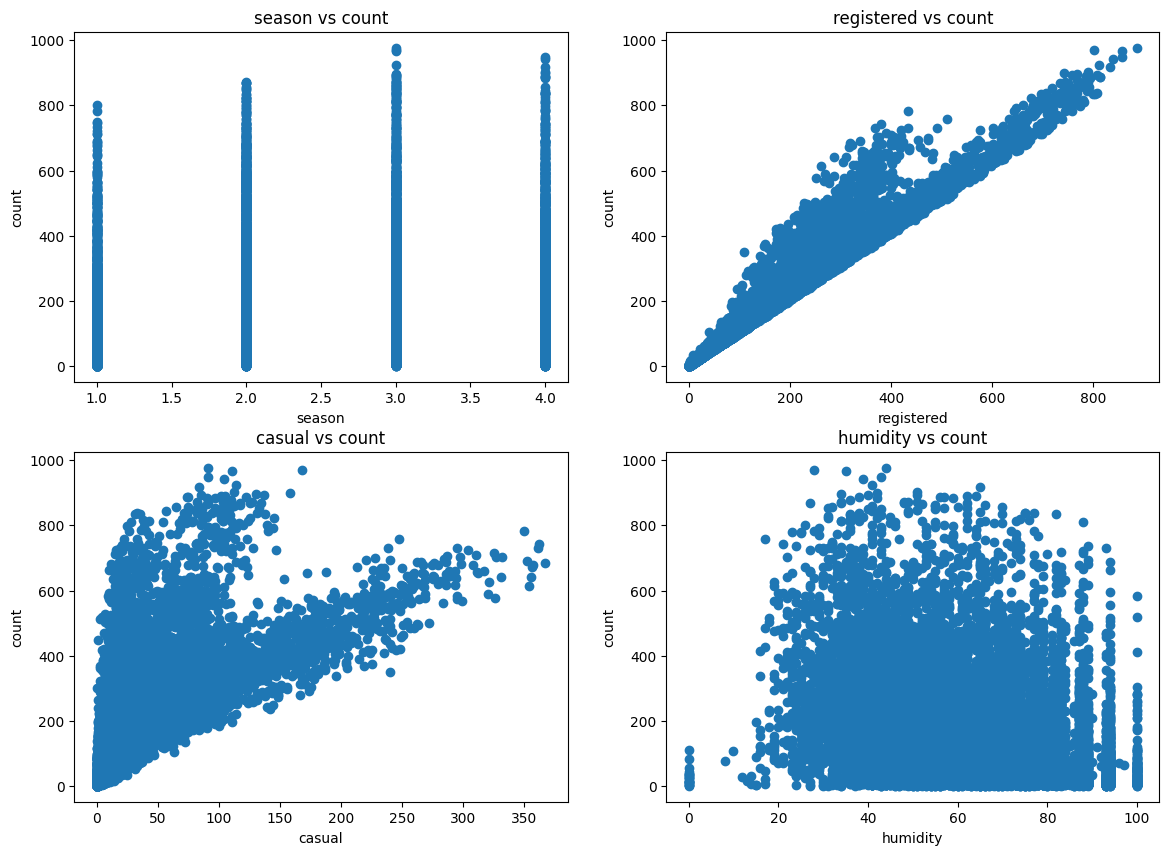

In [30]:
# 2- Analyze Relationships:  - Usescatter plots or bar charts to analyze relationships between features and the target variable.

#  Scatter Plot

# To create a scatter plot for some features and count (target) in the dataset
# Multifigure Plots (Subplots)
# لتوضيح العلاقة بين التارغيت وبعض الفيتشرز 

# Complex Multi-Figure Plot
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
plt.scatter(ecnoded_df['season'], ecnoded_df['count'])
plt.title('season vs count')
plt.xlabel('season')
plt.ylabel('count')

plt.subplot(2, 2, 2)
plt.scatter(ecnoded_df['registered'], ecnoded_df['count'])
plt.title('registered vs count')
plt.xlabel('registered')
plt.ylabel('count')

plt.subplot(2, 2, 3)
plt.scatter(ecnoded_df['casual'], ecnoded_df['count'])
plt.title('casual vs count')
plt.xlabel('casual')
plt.ylabel('count')

plt.subplot(2, 2, 4)
plt.scatter(ecnoded_df['humidity'], ecnoded_df['count'])
plt.title('humidity vs count')
plt.xlabel('humidity')
plt.ylabel('count')
plt.show()


In [31]:
#  يبدو ان اكثرهم علاقة بارتفاع عدد الايجارات هو registered
# ثم يليه casual

# season يبدو انه لا يؤثر على عدد الايجارات
# وسوف نتأكد من ذلك عند عمل Correlation map

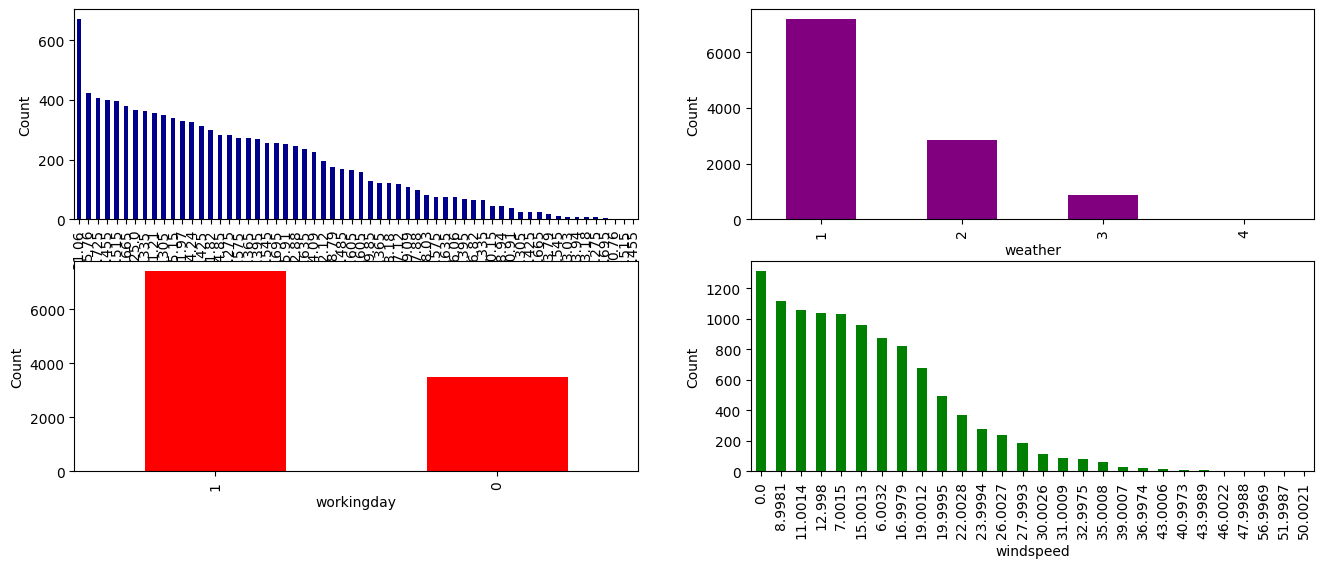

In [32]:
plt.figure(figsize=(16, 6))
plt.subplot(2,2,1)
ecnoded_df['atemp'].value_counts().plot(kind  = 'bar', color = 'darkblue')
plt.xlabel('atemp')
plt.ylabel('Count')

plt.subplot(2,2,2)
ecnoded_df['weather'].value_counts().plot(kind = 'bar', color = 'purple')
plt.xlabel('weather')
plt.ylabel('Count')

plt.subplot(2,2,3)
ecnoded_df['workingday'].value_counts().plot(kind = 'bar', color = 'red')
plt.xlabel('workingday')
plt.ylabel('Count')

plt.subplot(2,2,4)
ecnoded_df['windspeed'].value_counts().plot(kind = 'bar', color = 'green')
plt.xlabel('windspeed')
plt.ylabel('Count')
plt.show()


In [33]:
# نستنتج من الرسمات أن معظم المركبات في مجموعة البيانات المستخدمة تم تأجيرها في الايام التي كانوا يشعروا وكأن درجة الحرارة تبلغ 31.06 , وعندما كان الطقس 1: صافٍ، غيوم قليلة، غائم جزئيًا، غائم جزئيًا، وعندما كان اليوم هو يوم عمل وليس يوم عطلة , وعندما كانت سرعة الهواء منخفضة جدا . 
# من هذا نستطيع أن نقول بشكل مبدئي أن هذا النموذج مناسب لتوقع تأجيرات الدراجات عندما تكون درجة الحرارة 31 والطقس : صافٍ، غيوم قليلة، غائم جزئيًا, وفي ايام العمل , وعندما تنخفض سرعة الهواء .

                 season   holiday  workingday   weather      temp     atemp  \
season         1.000000  0.029368   -0.008126  0.008879  0.258689  0.264744   
holiday        0.029368  1.000000   -0.250491 -0.007074  0.000295 -0.005215   
workingday    -0.008126 -0.250491    1.000000  0.033772  0.029966  0.024660   
weather        0.008879 -0.007074    0.033772  1.000000 -0.055035 -0.055376   
temp           0.258689  0.000295    0.029966 -0.055035  1.000000  0.984948   
atemp          0.264744 -0.005215    0.024660 -0.055376  0.984948  1.000000   
humidity       0.190610  0.001929   -0.010880  0.406244 -0.064949 -0.043536   
windspeed     -0.147121  0.008409    0.013373  0.007261 -0.017852 -0.057473   
casual         0.096758  0.043799   -0.319111 -0.135918  0.467097  0.462067   
registered     0.164011 -0.020956    0.119460 -0.109340  0.318571  0.314635   
count          0.163439 -0.005393    0.011594 -0.128655  0.394454  0.389784   
date_2011_01  -0.274073  0.033048   -0.029770  0.007

<Axes: title={'center': 'Correlation Map'}>

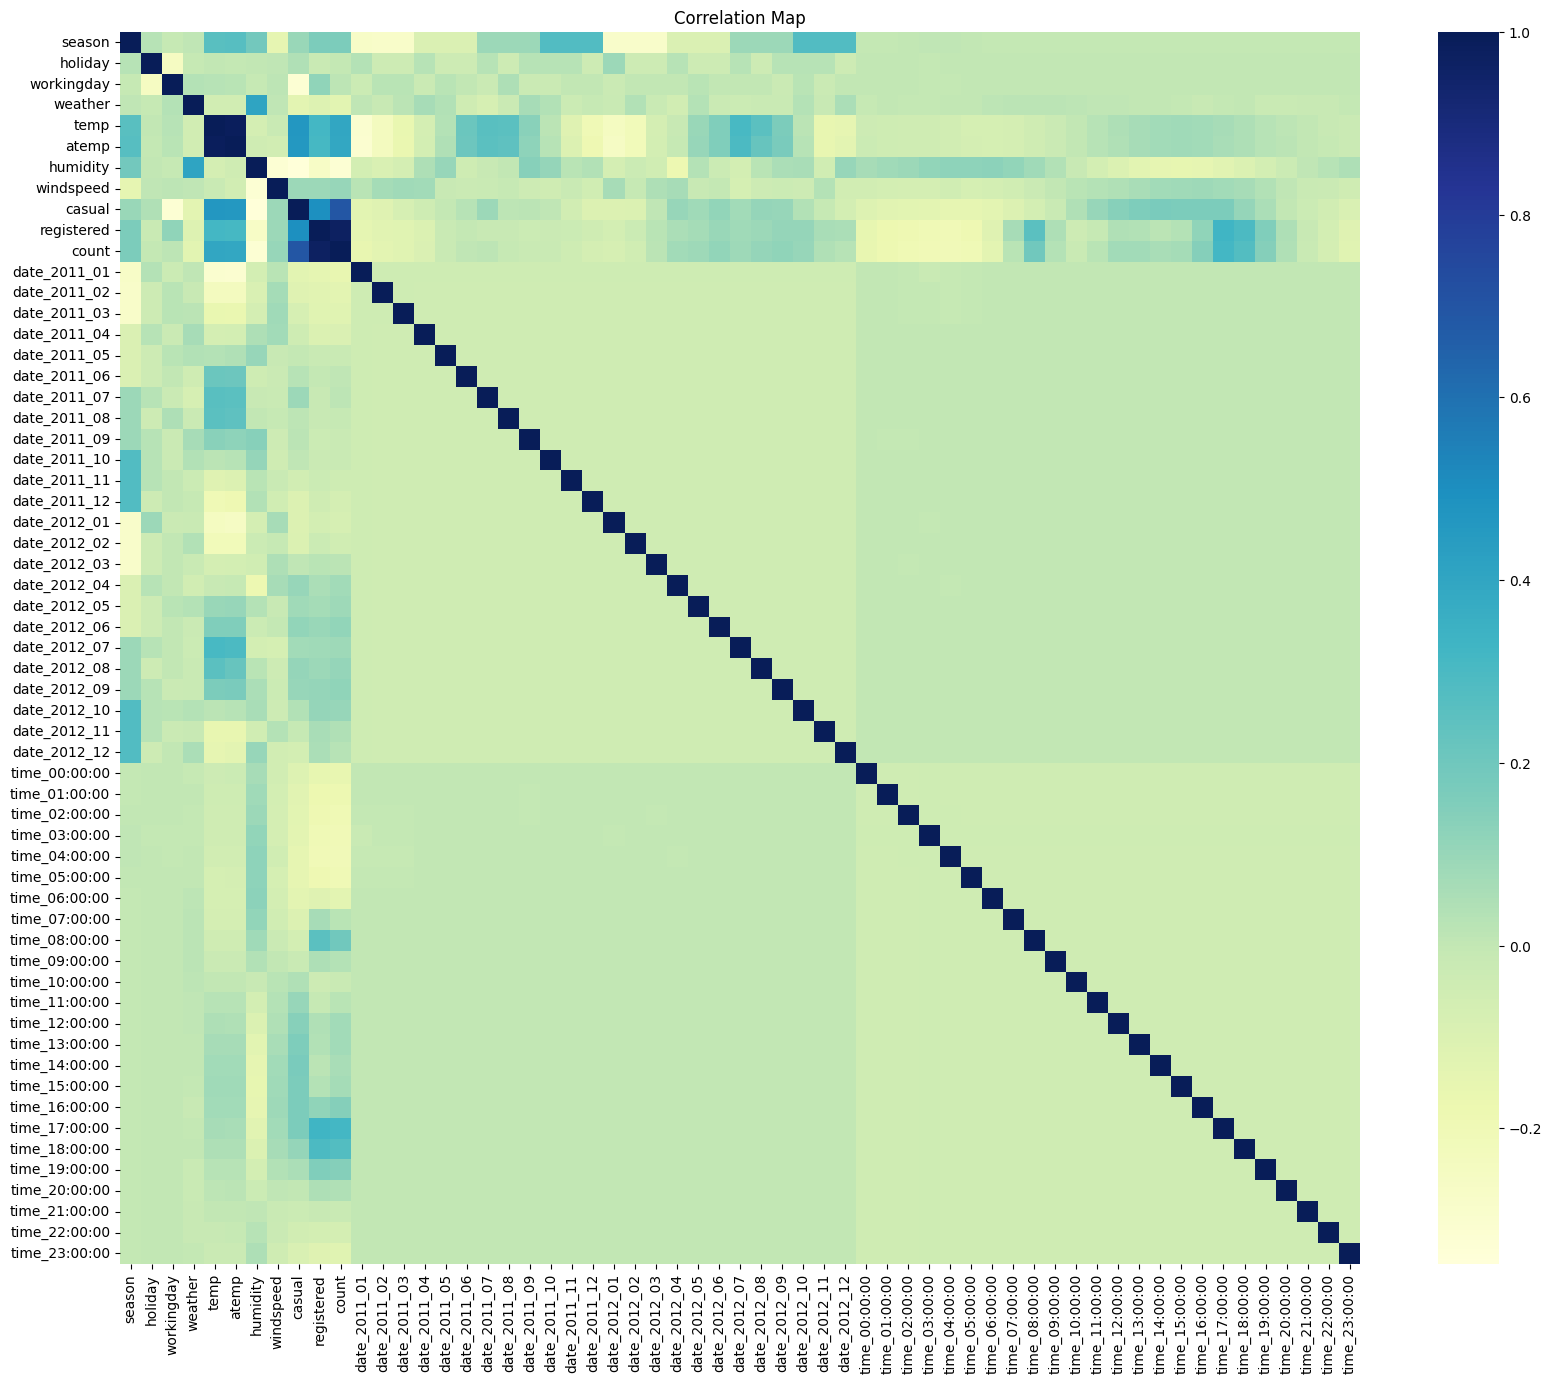

In [34]:
# 3- Correlation Analysis: - Create a correlation heatmap to identify features strongly correlated with the target variable.

# Heatmap

matrix=ecnoded_df.corr()
print(matrix)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,16))
plt.title('Correlation Map')
sns.heatmap(matrix, annot=False,cmap="YlGnBu")


In [35]:
# هذه الرسمة تمثل التوافق بين كل الأعمدة، الذي يهمنا هو صف (الايجارات). عند النظر إليه، نلاحظ أن قيم توافقه مع باقي الأعمدة تتراوح ما بين -1 و 1. إذا كانت القيمة قريبة من 1 فهذا يعني أن ارتفاع قيمة هذا العمود سيؤدي إلى ارتفاع فرصة الايجار, والعكس صحيح.

# نستطيع إيجاد ماهي أعلى القيم المتوافقة مع قيمة ايجارات الدراجات إما إيجابيا أو سلبيا عن طريق التالي

# أكثر 5 قيم التي ترفع من عدد الايجارات
matrix['count'].sort_values(ascending=False)[1:6]


registered       0.970948
casual           0.690414
temp             0.394454
atemp            0.389784
time_17:00:00    0.319974
Name: count, dtype: float64

In [36]:
# أكثر 5 القيم التي تنقص من عدد الايجارات
matrix['count'].sort_values(ascending=True)[1:6]


time_04:00:00   -0.210298
time_03:00:00   -0.202045
time_05:00:00   -0.197414
time_02:00:00   -0.192919
time_01:00:00   -0.181640
Name: count, dtype: float64

 3. Feature Engineering:

        1- Create New Features:

            - Generate at least one new feature from the existing data

        2- Explain Feature Importance:
        
            - Briefly discuss why the new feature(s) might improve model performance.

In [37]:
# I added the time column and date column,and extracted it from the datetime column.

 4. Build and Evaluate a Linear Regression Model:

      1- Train-Test Split:

      2- Train the Model:

         - Train a Linear Regression model on the training data.

      3- Evaluate the Model:

         - Usemetrics like MAE, RMSE, and R² Score to assess performance.
         
         - Plot and interpret residuals to evaluate how well the model fits the data.

In [38]:
# 1. Train-Test Split:
# الآن، سوف نقوم بفصل البيانات على مرتين: الفصل الأول سنقوم بفصل العمود المستهدف (عدد الايجارات) عن باقي الأعمدة (المتغيرات المستقلة) عن طريق التالي
# والسبب وراء هذا الفصل هو أننا نريد استخدام الأعمدة المستقلة لتوقع قيمة العمود المستهدف (عمود عدد الايجارات).
# X(Columns) * (Parameters) >> leads to Y(Predictions)

# Create X & y - 
# X represetns the independet variables - 
X = ecnoded_df.drop('count', axis = 1)

# Targer variable -
y = ecnoded_df['count']


In [39]:
# الآن الفصل الثاني هو فصل (التدريب/الاختبار) والذي نقوم به في هذا الفصل هو أخذ نسبة من البيانات وفصلها عن طريق عدم وضعها في مرحلة تدريب النموذج. والسبب في قيام ذلك هو أننا نريد اختبار دقة عمل النموذج في الحياة الواقعية وإذا اختبرنا النموذج على نفس البيانات التي دربناه عليها سوف يحرز نتائج عالية بسهولة. ومن أجل ذلك نحن نبقي جزء من البيانات من غير تدريب لإجراء الاختبارات عليه .
from sklearn.model_selection import train_test_split # for splitting the data - الكود المستخدم لفصل البيانات

# We will make the test size = 30% - 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1204)


In [40]:
len(X_train), len(X_test), len(X_train+X_test)

(7620, 3266, 10886)

In [41]:
# نلاحظ أن عملية الفصل انتجت لنا 4 متغيرات ووصفهم كالتالي
# ●	X_train: هي الصفوف التي سوف نستخدمها في تدريب النموذج.
# ●	y_train: هي عدد ايجارات الدراجات في الصفوف التي سوف ندرب النموذج عليها.
# ●	X_test: هي الصفوف التي نريد توقعها من أجل اختبار دقة النموذج
# ●	y_test: هي ايجارات الصفوف الحقيقة والتي سوف نقارن توقعات النموذج بها


In [42]:
X_train.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,time_14:00:00,time_15:00:00,time_16:00:00,time_17:00:00,time_18:00:00,time_19:00:00,time_20:00:00,time_21:00:00,time_22:00:00,time_23:00:00
2569,2,0,1,1,22.96,26.515,68,15.0013,19,91,...,False,False,False,False,False,False,False,False,False,True
1279,1,0,1,1,14.76,17.425,71,12.9980,1,4,...,False,False,False,False,False,False,False,False,False,False
2733,3,0,0,1,32.80,34.850,33,15.0013,156,149,...,False,False,False,False,False,True,False,False,False,False


In [43]:
# Scaling
# الآن سوف نقوم بخطوة أخيرة قبل التدريب: هي توحيد المقاييس .
# لماذا نقوم بتوحيد المقاييس؟ سوف تلاحظ أن لدينا عدة اعمدة لتوقع عدد الايجارات:  إن لم نقم بتوحيد المقاييس سوف يكون أثر بعض الاعمدة أكبر بكثير من الاخرين لأن قيمهم اكبر بكثير من القيم الاخرى . ولحل هذه المشكلة نقوم بتوحيد المقاييس بتطبيق اجراء سوف ينتج قيم جديدة للأعمدة تتراوح ما بين الصفر والواحد, حيث أن صفر تمثل أقل قيمة وواحد تمثل أعلى قيمة. وبذلك، نحن نجعل أثر كل عمود في توقع عدد الايجارات متساوي مع الأعمدة الأخرى لأن كل قيم الأعمدة تتراوح ما بين 0-1.

from sklearn.preprocessing import MinMaxScaler # To scale columns - لتوحيد المقاييس

s = MinMaxScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

X_train_s, X_test_s

(array([[0.33333333, 0.        , 1.        , ..., 0.        , 0.        ,
         1.        ],
        [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.66666667, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.66666667, 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ]], shape=(7620, 58)),
 array([[1.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.33333333, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 1.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.     

In [44]:
#  2. Train the Model: Train a Linear Regression model on the training data.
# في هذا المشروع، سوف نستخدم نوعين من الانحدار الخطي، ألا وهم Lasso and Ridge 
# وسوف نختار الذي سوف يحرز نتيجة أعلى في اختبار تقييم الأداء

from sklearn.linear_model import  Lasso, Ridge #  لتدريب نموذج الانحدار الخطي
# Lasso regression model - نموذج لاسو
Lasso = Lasso() 
Lasso.fit(X_train_s, y_train) # Train the model using training data -
Lasso_pred = Lasso.predict(X_test_s) #  الآن نقوم بتوقع أسعار السيارات في صفوف الاختبار


In [45]:
# Ridge regression model
Ridge = Ridge() # Initiate ridge object
Ridge.fit(X_train_s, y_train)
Ridge_pred = Ridge.predict(X_test_s)


In [46]:
# Evaluate the Model: Use metrics like MAE, RMSE, and R² Score to assess performance.
# R²: قيمة تتراوح بين 0-1 كلما اقتربنا من 1 كل ما كان توقعنا قريب من القيمة الحقيقية.
# RMSE: قيمة تمثل كمية الخطأ في توقعنا، كلما أخطأنا كلما ارتفعت
# MAE: هي متوسط القيم المطلقة للفروق بين القيم الحقيقية والتوقعات,اي هي متوسط حجم الخطأ الذي يحدث في التوقعات, كلما كانت قيمتها أقل، كان التوقع أفضل.


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # for evaluation
import numpy as np

#Evalaute Lasso model performance 
print('Lasso')
print('R2 value is', r2_score(y_test, Lasso_pred))
print('RMSE value is', np.sqrt(mean_squared_error(y_test, Lasso_pred)))
print('MAE value is', mean_absolute_error(y_test, Lasso_pred))

#Evalaute Ridge model performance 
print('\nRidge')
print('R2 value is', r2_score(y_test, Ridge_pred))
print('RMSE value is', np.sqrt(mean_squared_error(y_test, Ridge_pred)))
print('MAE value is', mean_absolute_error(y_test, Ridge_pred))



Lasso
R2 value is 0.998137284726811
RMSE value is 7.815490972052597
MAE value is 5.929042859143269

Ridge
R2 value is 0.9999567432540661
RMSE value is 1.1909950345885727
MAE value is 0.880192700844708


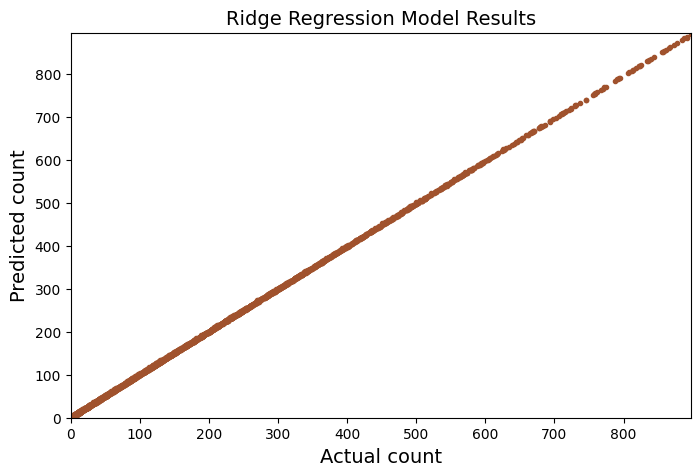

In [47]:
# نستنتج أن أداء نموذج الردج كان أعلى من نموذج اللاسو، ولذلك سوف نعتمده في مشروعنا هذا. في الأسفل مقارنة بين الايجارات المتوقعة عن طريق نموذج الردج والحقيقية، كل ما كان الخط مستقيم كل ما كان النموذج أكثر دقة.
# - Plot and interpret residuals to evaluate how well the model fits the data.
figure = plt.figure(figsize=(8,5))
ax = plt.axes()
ax.plot(y_test, Ridge_pred, marker='o', ls='', ms=3.0,color='sienna')

lim = (0, y_test.max())

ax.set(xlabel='Actual count',
        ylabel='Predicted count',
        xlim=lim,
        ylim=lim)
plt.title('Ridge Regression Model Results', fontsize=14)
ax.xaxis.label.set_size(14);
ax.yaxis.label.set_size(14);


<Axes: xlabel='count', ylabel='Count'>

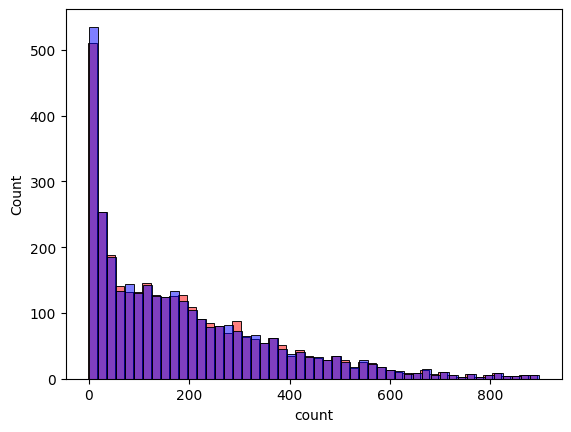

In [48]:
# Bonus Task 
sns.histplot(Ridge_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_test, color='blue', alpha=0.5, bins=50)

In [49]:
X_test_s[3] , Ridge_pred[3] , y_test[2230]

(array([0.66666667, 0.        , 1.        , 0.        , 0.75510204,
        0.745721  , 0.4       , 0.3508875 , 0.24250681, 0.42437923,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]),
 np.float64(464.9344882876744),
 np.int64(282))

-----------------------------------------------------------------------------

 <h4 style='font-size:20px;color:red'>We will drop the duplication in the rows, Then see and apply the model and compare the results later.</h4>

In [50]:
ecnoded_df.loc[ecnoded_df.duplicated()]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,time_14:00:00,time_15:00:00,time_16:00:00,time_17:00:00,time_18:00:00,time_19:00:00,time_20:00:00,time_21:00:00,time_22:00:00,time_23:00:00
4682,4,0,1,1,12.30,16.665,87,0.0000,0,4,...,False,False,False,False,False,False,False,False,False,False
5188,4,0,0,1,9.84,12.880,65,7.0015,1,10,...,False,False,False,False,False,False,False,False,False,False
6212,1,0,1,1,12.30,16.665,61,0.0000,0,4,...,False,False,False,False,False,False,False,False,False,False
9450,3,0,1,1,20.50,24.240,77,6.0032,0,7,...,False,False,False,False,False,False,False,False,False,False


In [51]:
ecnoded_df = ecnoded_df.drop_duplicates()

In [52]:
ecnoded_df.loc[ecnoded_df.duplicated()]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,time_14:00:00,time_15:00:00,time_16:00:00,time_17:00:00,time_18:00:00,time_19:00:00,time_20:00:00,time_21:00:00,time_22:00:00,time_23:00:00


In [53]:
ecnoded_df.shape

(10882, 59)

In [54]:
# 1. Train-Test Split:
# الآن، سوف نقوم بفصل البيانات على مرتين: الفصل الأول سنقوم بفصل العمود المستهدف (عدد الايجارات) عن باقي الأعمدة (المتغيرات المستقلة) عن طريق التالي
# والسبب وراء هذا الفصل هو أننا نريد استخدام الأعمدة المستقلة لتوقع قيمة العمود المستهدف (عمود عدد الايجارات).
# X(Columns) * (Parameters) >> leads to Y(Predictions)

# Create X & y - 
# X represetns the independet variables - 
X = ecnoded_df.drop('count', axis = 1)

# Targer variable -
y = ecnoded_df['count']


In [55]:
# الآن الفصل الثاني هو فصل (التدريب/الاختبار) والذي نقوم به في هذا الفصل هو أخذ نسبة من البيانات وفصلها عن طريق عدم وضعها في مرحلة تدريب النموذج. والسبب في قيام ذلك هو أننا نريد اختبار دقة عمل النموذج في الحياة الواقعية وإذا اختبرنا النموذج على نفس البيانات التي دربناه عليها سوف يحرز نتائج عالية بسهولة. ومن أجل ذلك نحن نبقي جزء من البيانات من غير تدريب لإجراء الاختبارات عليه بحيادية.
from sklearn.model_selection import train_test_split # for splitting the data - الكود المستخدم لفصل البيانات

# We will make the test size = 30% - 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1204)


In [56]:
len(X_train), len(X_test), len(X_train+X_test)

(7617, 3265, 10882)

In [57]:
# نلاحظ أن عملية الفصل انتجت لنا 4 متغيرات ووصفهم كالتالي
# ●	X_train: هي الصفوف التي سوف نستخدمها في تدريب النموذج.
# ●	y_train: هي عدد ايجارات الصفوف التي سوف ندرب النموذج عليها.
# ●	X_test: هي الصفوف التي نريد توقعها من أجل اختبار دقة النموذج
# ●	y_test: هي ايجارات الصفوف الحقيقة والتي سوف نقارن توقعات النموذج بها


In [58]:
X_train.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,time_14:00:00,time_15:00:00,time_16:00:00,time_17:00:00,time_18:00:00,time_19:00:00,time_20:00:00,time_21:00:00,time_22:00:00,time_23:00:00
6875,2,0,1,1,27.06,31.060,39,15.0013,75,419,...,False,False,False,False,False,True,False,False,False,False
5811,1,0,1,3,12.30,14.395,81,19.0012,3,90,...,False,False,False,False,False,False,False,False,False,False
6909,2,0,1,1,13.12,15.150,53,22.0028,0,23,...,False,False,False,False,False,False,False,False,False,False


In [59]:
# Scaling
# الآن سوف نقوم بخطوة أخيرة قبل التدريب: هي توحيد المقاييس .
# لماذا نقوم بتوحيد المقاييس؟ سوف تلاحظ أن لدينا عدة اعمدة لتوقع عدد الايجارات:  إن لم نقم بتوحيد المقاييس سوف يكون أثر بعض الاعمدة أكبر بكثير من الاخرين لأن قيمهم اكبر بكثير من القيم الاخرى . ولحل هذه المشكلة نقوم بتوحيد المقاييس بتطبيق اجراء سوف ينتج قيم جديدة للأعمدة تتراوح ما بين الصفر والواحد, حيث أن صفر تمثل أقل قيمة وواحد تمثل أعلى قيمة. وبذلك، نحن نجعل أثر كل عمود في توقع عدد الايجارات متساوي مع الأعمدة الأخرى لأن كل قيم الأعمدة تتراوح ما بين 0-1.

from sklearn.preprocessing import MinMaxScaler # To scale columns - لتوحيد المقاييس

s = MinMaxScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

X_train_s, X_test_s

(array([[0.33333333, 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.33333333, 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.66666667, 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ]], shape=(7617, 58)),
 array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.     

In [60]:
#  2. Train the Model: Train a Linear Regression model on the training data.
# سوف نختار Ridge
# لانه احرز نتائج اعلى في اختبار تقييم الاداء في النموذج السابق

from sklearn.linear_model import Ridge #  لتدريب نموذج الانحدار الخطي
# Ridge regression model
Ridge = Ridge() # Initiate ridge object
Ridge.fit(X_train_s, y_train)
Ridge_pred = Ridge.predict(X_test_s)


In [61]:
# Evaluate the Model: Use metrics like MAE, RMSE, and R² Score to assess performance.
# R²: قيمة تتراوح بين 0-1 كلما اقتربنا من 1 كل ما كان توقعنا قريب من القيمة الحقيقية.
# RMSE: قيمة تمثل كمية الخطأ في توقعنا، كلما أخطأنا كلما ارتفعت
# MAE: هي متوسط القيم المطلقة للفروق بين القيم الحقيقية والتوقعات,اي هي متوسط حجم الخطأ الذي يحدث في التوقعات, كلما كانت قيمتها أقل، كان التوقع أفضل.


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # for evaluation
import numpy as np

# Evalaute Ridge model performance 

print('\nRidge')
print('R2 value is', r2_score(y_test, Ridge_pred))
print('RMSE value is', np.sqrt(mean_squared_error(y_test, Ridge_pred)))
print('MAE value is', mean_absolute_error(y_test, Ridge_pred))




Ridge
R2 value is 0.9999574499885516
RMSE value is 1.1825881768504087
MAE value is 0.8731317569664979


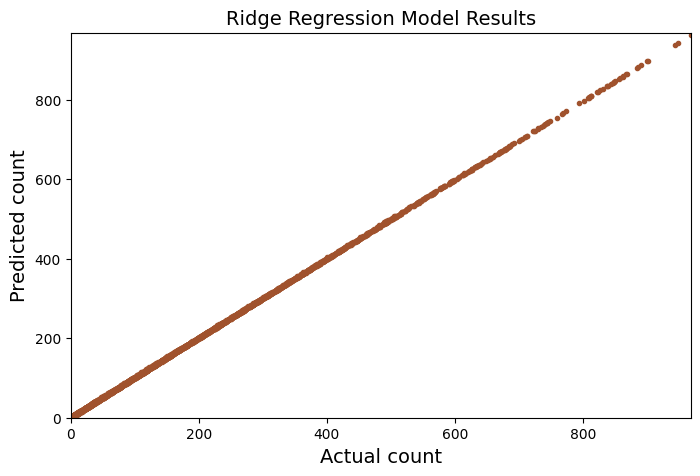

In [62]:
#  في الأسفل مقارنة بين الايجارات المتوقعة عن طريق نموذج الردج والحقيقية، كل ما كان الخط مستقيم كل ما كان النموذج أكثر دقة.
# - Plot and interpret residuals to evaluate how well the model fits the data.
figure = plt.figure(figsize=(8,5))
ax = plt.axes()
ax.plot(y_test, Ridge_pred, marker='o', ls='', ms=3.0,color='sienna')

lim = (0, y_test.max())

ax.set(xlabel='Actual count',
        ylabel='Predicted count',
        xlim=lim,
        ylim=lim)
plt.title('Ridge Regression Model Results', fontsize=14)
ax.xaxis.label.set_size(14);
ax.yaxis.label.set_size(14);


<Axes: xlabel='count', ylabel='Count'>

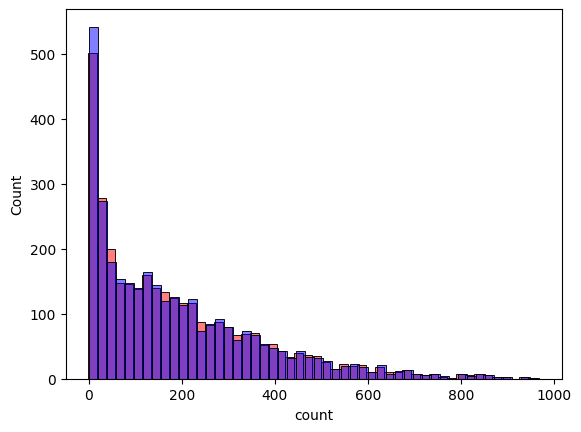

In [63]:
# Bonus Task 
sns.histplot(Ridge_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_test, color='blue', alpha=0.5, bins=50)

In [64]:
X_test_s[3] , Ridge_pred[3] , y_test[3428]

(array([0.33333333, 0.        , 1.        , 0.        , 0.55319149,
        0.55934668, 0.77      , 0.33337252, 0.12921348, 0.26636569,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        ]),
 np.float64(281.30832821628314),
 np.int64(465))

-----------------------------------------------------------------------------

 <h4 style='font-size:20px;color:red'>We will drop all the date columns, Then see and apply the model and compare the results later.</h4>
 سوف نعود للخطوة التي بعد فصل عمود التاريخ والوقت الى عمودين , وقبل عمل الانكودينج
 
 نقوم بحذف عمود التاريخ وابقاء عمود الوقت وعمل الانكودينج له فقط

In [65]:
dff = df.drop('date', axis = 1)
dff

,time,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [66]:
ecnoded_df = pd.get_dummies(dff)
print('The new dff is')
display(ecnoded_df.head(3))
print('The size of the dataframe is')
print(' We have', ecnoded_df.shape[0], 'rows, and', ecnoded_df.shape[1], 'columns')

The new dff is


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,time_14:00:00,time_15:00:00,time_16:00:00,time_17:00:00,time_18:00:00,time_19:00:00,time_20:00:00,time_21:00:00,time_22:00:00,time_23:00:00
0,1,0,0,1,9.84,14.395,81,0.0,3,13,...,False,False,False,False,False,False,False,False,False,False
1,1,0,0,1,9.02,13.635,80,0.0,8,32,...,False,False,False,False,False,False,False,False,False,False
2,1,0,0,1,9.02,13.635,80,0.0,5,27,...,False,False,False,False,False,False,False,False,False,False


The size of the dataframe is
 We have 10886 rows, and 35 columns


In [67]:
# 1. Train-Test Split:
# الآن، سوف نقوم بفصل البيانات على مرتين: الفصل الأول سنقوم بفصل العمود المستهدف (عدد الايجارات) عن باقي الأعمدة (المتغيرات المستقلة) عن طريق التالي
# والسبب وراء هذا الفصل هو أننا نريد استخدام الأعمدة المستقلة لتوقع قيمة العمود المستهدف (عمود عدد الايجارات).
# X(Columns) * (Parameters) >> leads to Y(Predictions)

# Create X & y - 
# X represetns the independet variables - 
X = ecnoded_df.drop('count', axis = 1)

# Targer variable -
y = ecnoded_df['count']

In [68]:
# الآن الفصل الثاني هو فصل (التدريب/الاختبار) والذي نقوم به في هذا الفصل هو أخذ نسبة من البيانات وفصلها عن طريق عدم وضعها في مرحلة تدريب النموذج. والسبب في قيام ذلك هو أننا نريد اختبار دقة عمل النموذج في الحياة الواقعية وإذا اختبرنا النموذج على نفس البيانات التي دربناه عليها سوف يحرز نتائج عالية بسهولة. ومن أجل ذلك نحن نبقي جزء من البيانات من غير تدريب لإجراء الاختبارات عليه بحيادية.
from sklearn.model_selection import train_test_split # for splitting the data - الكود المستخدم لفصل البيانات

# We will make the test size = 30% - 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1204)


In [69]:
len(X_train), len(X_test), len(X_train+X_test)

(7620, 3266, 10886)

In [70]:
# نلاحظ أن عملية الفصل انتجت لنا 4 متغيرات ووصفهم كالتالي
# ●	X_train: هي الصفوف التي سوف نستخدمها في تدريب النموذج.
# ●	y_train: هي عدد ايجارات الصفوف التي سوف ندرب النموذج عليها.
# ●	X_test: هي الصفوف التي نريد توقعها من أجل اختبار دقة النموذج
# ●	y_test: هي ايجارات الصفوف الحقيقة والتي سوف نقارن توقعات النموذج بها


In [71]:
X_train.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,time_14:00:00,time_15:00:00,time_16:00:00,time_17:00:00,time_18:00:00,time_19:00:00,time_20:00:00,time_21:00:00,time_22:00:00,time_23:00:00
2569,2,0,1,1,22.96,26.515,68,15.0013,19,91,...,False,False,False,False,False,False,False,False,False,True
1279,1,0,1,1,14.76,17.425,71,12.9980,1,4,...,False,False,False,False,False,False,False,False,False,False
2733,3,0,0,1,32.80,34.850,33,15.0013,156,149,...,False,False,False,False,False,True,False,False,False,False


In [72]:
# Scaling
# الآن سوف نقوم بخطوة أخيرة قبل التدريب: هي توحيد المقاييس .
# لماذا نقوم بتوحيد المقاييس؟ سوف تلاحظ أن لدينا عدة اعمدة لتوقع عدد الايجارات:  إن لم نقم بتوحيد المقاييس سوف يكون أثر بعض الاعمدة أكبر بكثير من الاخرين لأن قيمهم اكبر بكثير من القيم الاخرى . ولحل هذه المشكلة نقوم بتوحيد المقاييس بتطبيق اجراء سوف ينتج قيم جديدة للأعمدة تتراوح ما بين الصفر والواحد, حيث أن صفر تمثل أقل قيمة وواحد تمثل أعلى قيمة. وبذلك، نحن نجعل أثر كل عمود في توقع عدد الايجارات متساوي مع الأعمدة الأخرى لأن كل قيم الأعمدة تتراوح ما بين 0-1.

from sklearn.preprocessing import MinMaxScaler # To scale columns - لتوحيد المقاييس

s = MinMaxScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

X_train_s, X_test_s

(array([[0.33333333, 0.        , 1.        , ..., 0.        , 0.        ,
         1.        ],
        [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.66666667, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.66666667, 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ]], shape=(7620, 34)),
 array([[1.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.33333333, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 1.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.     

In [73]:
#  2. Train the Model: Train a Linear Regression model on the training data.
# سوف نختار Ridge
# لانه احرز نتائج اعلى في اختبار تقييم الاداء في اول نموذج

from sklearn.linear_model import Ridge #  لتدريب نموذج الانحدار الخطي
# Ridge regression model
Ridge = Ridge() # Initiate ridge object
Ridge.fit(X_train_s, y_train)
Ridge_pred = Ridge.predict(X_test_s)


In [74]:
# Evaluate the Model: Use metrics like MAE, RMSE, and R² Score to assess performance.
# R²: قيمة تتراوح بين 0-1 كلما اقتربنا من 1 كل ما كان توقعنا قريب من القيمة الحقيقية.
# RMSE: قيمة تمثل كمية الخطأ في توقعنا، كلما أخطأنا كلما ارتفعت
# MAE: هي متوسط القيم المطلقة للفروق بين القيم الحقيقية والتوقعات,اي هي متوسط حجم الخطأ الذي يحدث في التوقعات, كلما كانت قيمتها أقل، كان التوقع أفضل.


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # for evaluation
import numpy as np

# Evalaute Ridge model performance 

print('\nRidge')
print('R2 value is', r2_score(y_test, Ridge_pred))
print('RMSE value is', np.sqrt(mean_squared_error(y_test, Ridge_pred)))
print('MAE value is', mean_absolute_error(y_test, Ridge_pred))




Ridge
R2 value is 0.9999640884118951
RMSE value is 1.085176383148961
MAE value is 0.7785037252088937


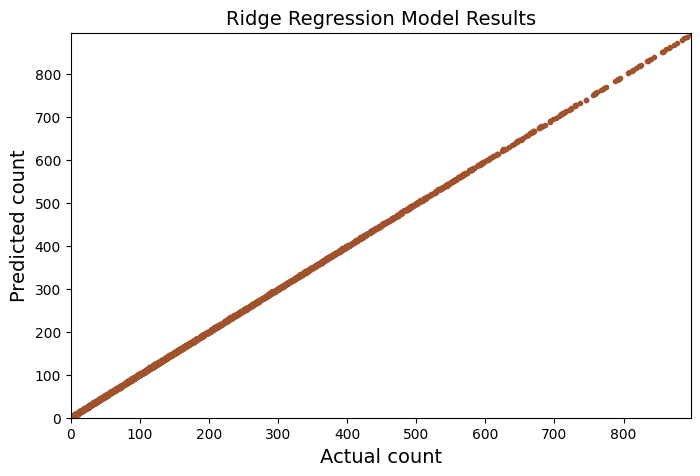

In [75]:
#  في الأسفل مقارنة بين الايجارات المتوقعة عن طريق نموذج الردج والحقيقية، كل ما كان الخط مستقيم كل ما كان النموذج أكثر دقة.
# - Plot and interpret residuals to evaluate how well the model fits the data.
figure = plt.figure(figsize=(8,5))
ax = plt.axes()
ax.plot(y_test, Ridge_pred, marker='o', ls='', ms=3.0,color='sienna')

lim = (0, y_test.max())

ax.set(xlabel='Actual count',
        ylabel='Predicted count',
        xlim=lim,
        ylim=lim)
plt.title('Ridge Regression Model Results', fontsize=14)
ax.xaxis.label.set_size(14);
ax.yaxis.label.set_size(14);


<Axes: xlabel='count', ylabel='Count'>

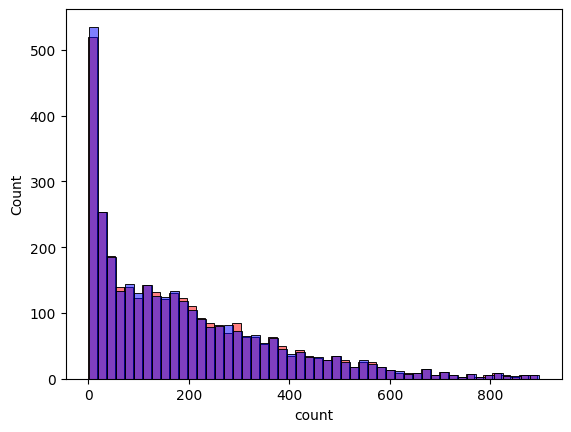

In [76]:
# Bonus Task 
sns.histplot(Ridge_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_test, color='blue', alpha=0.5, bins=50)

In [77]:
X_test_s[3] , Ridge_pred[3] , y_test[3428]

(array([0.66666667, 0.        , 1.        , 0.        , 0.75510204,
        0.745721  , 0.4       , 0.3508875 , 0.24250681, 0.42437923,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 np.float64(465.6205214321727),
 np.int64(465))

<h3 style='font-size:20px;color:red;font-weight:bold'>My report</h3>
I have explained each paragraph and step separately in the code above, and here is a summary:

1. Data Preprocessing:

- Inspection: Dataset inspected for shape, column data types, missing values, and duplicates. Results indicate no missing or duplicate rows initially.

- Datetime Handling: Datetime column split into date and time. Then, the date was transformed to only retain year and month, optimizing dimensionality.

- Encoding: Categorical variables were encoded using one-hot encoding.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

2. EDA Highlights:

- Target Variable Analysis: The distribution of bike rentals (count) indicates a right-skewed distribution with high variability.

- Relationships with Features: Scatter plots and bar charts revealed key relationships:

          Strong correlation between count and registered users.

          Weak or unclear correlation between count and other variables like season.

- Correlation Map: A heatmap highlighted features with significant positive or negative correlations with count.

(I have explained each step separately in the code above, please see)

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
3. Feature Engineering:

New features derived include time and a consolidated year and month column from the original datetime.

In the third model we removed the date column, and the results were that it achieved the best model of the models. This suggests that the date column might have introduced noise or redundancy in the model, and its removal improved overall performance.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
4. Model Training and Evaluation:

Data split into training (70%) and testing (30%) sets.

Ridge regression selected due to superior performance compared to Lasso regression.

Metrics:
Comparison of Results:
<table>
<thead>
<tr>
<th>Scenario</th>
<th>R² Value</th>
<th>RMSE</th>
<th>MAE</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>Before Deduplication</strong></td>
<td>0.9999567432540661</td>
<td>1.1909950345885727</td>
<td>0.880192700844708</td>
</tr>
<tr>
<td><strong>After Deduplication</strong></td>
<td>0.9999574499885516</td>
<td>1.1825881768504087</td>
<td>0.8731317569664979</td>
</tr>
<tr>
<td><strong>After Removing Date</strong></td>
<td>0.9999640884118951</td>
<td>1.085176383148961</td>
<td>0.7785037252088937</td>
</tr>
</tbody>


<strong style='color:brown'>The best model is the one after removing the date column, as it achieves the highest R² value and the lowest RMSE and MAE. This suggests that the date column might have introduced noise or redundancy in the model, and its removal improved overall performance.</strong>

(Look at the table below. The table appears below because it was written in html, my goal was to write it before this analysis here.)

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

5. Visualization:
Scatter plots for residuals and a combined histogram for predictions vs. actual values showcase the model's accuracy.
